In [2]:
import numpy as np
import pandas as pd
import numpy.random as ran
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.integrate import odeint


In [3]:
def transition_model(x, t, kPQ, kQP, uP, uQ):
    """
    this is the model to be fitted x[0] is P and x[1] is Q
    uP is the proliferation rate of proliferative cells P
    uQ is the death rate of quiscent cells Q
    kPQ and kQP are transition rates between the two phenotypes
    """
    dP = (uP - kPQ) * x[0] + kQP * x[1]
    dQ = (uQ - kQP) * x[1] + kPQ * x[0]

    return np.array([dP, dQ])



In [4]:
#time
dt = 1 #[hour]
T = 120 #days
nt = 120
t = np.linspace (0, T, nt)
t=np.arange(1,121,1)#every day
#t = (1,10,20,30,40,50,60,80,100,120) # ten points
#t = (1,30,60,90,120) # 5 points
#t=(1,20,60,90,120) #5 points
#t=(1,30,60,120) #4 points
#t=(1,60,120)



In [5]:
#initial condition estimated in general - proliferative are 15 % and quiescent 85 %
P0 = 1.5*(10**11) #4.86*(10**11) 
Q0 =  8.5*(10**11)#1.67*(10**12)
ini_cond = np.array([P0, Q0])
# if a put the initial number of cells of the patients that do not fit, model works

In [6]:
#params patient 8 - id77
kPQ = 54.97 
kQP = 0.20
uP = 54.06
uQ = -12.44

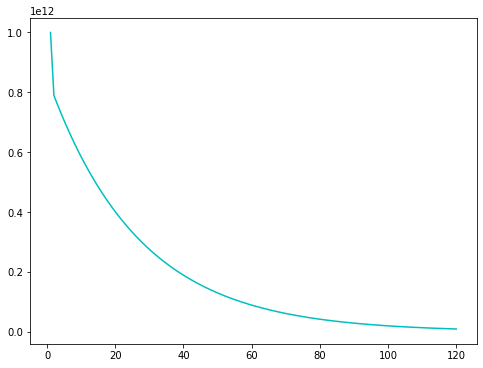

In [7]:
out = odeint(transition_model, ini_cond, t, args=(kPQ,kQP,uP,uQ))
plt.figure(figsize=(8, 6))
plt.plot(t, out[:,1]+out[:,0],label="tot",color="c")
plt.show()

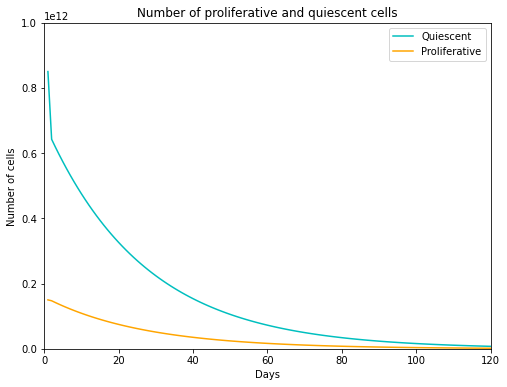

In [8]:
out = odeint(transition_model, ini_cond, t, args=(kPQ,kQP,uP,uQ))
plt.figure(figsize=(8, 6))
plt.plot(t, out[:,1],label="Quiescent",color="c")
plt.plot(t,out[:,0],label="Proliferative",color="orange")
scale_factor = 1e12
plt.ylim([0, 1 * scale_factor])
plt.xlim(0,120)
plt.xlabel("Days")
plt.ylabel("Number of cells")
plt.title("Number of proliferative and quiescent cells")
plt.legend()
plt.show()
#add legend and xlabel

In [9]:
df=pd.DataFrame(out)
N = 121 
df["Days"] = np.arange(1,121,1)
df["Replicate"] = -1                                                                                                                             
df["Sigma"] = 0  
df.columns=("P","Q","Days","Replicate","Sigma")
df = df[['Days','Replicate','P','Q','Sigma']]

In [10]:
#df[:120]

In [11]:
#add noise
P = df["P"]
signal_P=P.copy()
mu, sigma = 0, 10**10
noise_P = np.random.normal(mu, sigma,P.shape)
df["P"]= signal_P + noise_P

Q = df["Q"]
signal_Q=Q.copy()
mu, sigma = 0, 10**10
noise_Q = np.random.normal(mu, sigma,Q.shape)
df["Q"] = signal_Q + noise_Q



In [12]:
df["Replicate"] = 0                                                                                                                            
df["Sigma"] = "10^10"
df.head()

,Days,Replicate,P,Q,Sigma
0,1,0,1.699583e+11,8.361394e+11,10^10
1,2,0,1.516084e+11,6.422603e+11,10^10
2,3,0,1.347936e+11,6.073332e+11,10^10
3,4,0,1.425540e+11,5.992896e+11,10^10
4,5,0,1.296072e+11,5.825561e+11,10^10


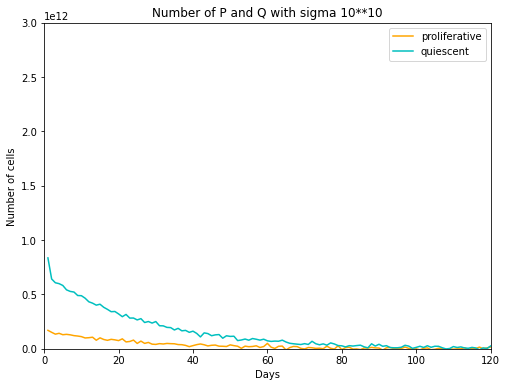

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(t,df["P"],label="proliferative",color="orange")
plt.plot(t,df["Q"],label="quiescent",color="c")
plt.xlabel("Days")
plt.ylabel("Number of cells")
plt.title("Number of P and Q with sigma 10**10")
plt.legend()
scale_factor = 1e12
plt.ylim([0, 3* scale_factor])
plt.xlim(0,120)
plt.show()

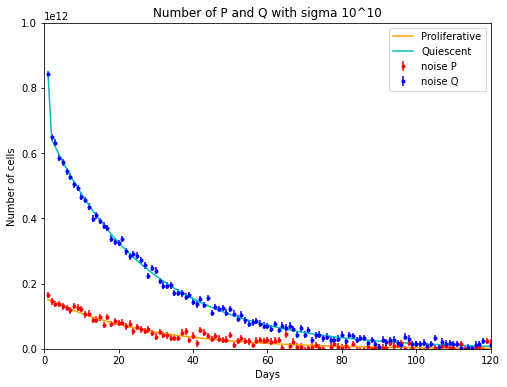

In [20]:
#noise 10**10 every day

fig = plt.figure(figsize=(8, 6))
dy = 10**10
y = out[:,0] + dy * np.random.randn(120)
plt.plot(t, out[:,0],label="Proliferative",color="orange")
plt.errorbar(t, y, yerr=dy, fmt='.r',label="noise P");
y1=out[:,1] + dy * np.random.randn(120)
plt.plot(t, out[:,1],label="Quiescent",color="c")
plt.errorbar(t, y1, yerr=dy, fmt='.b',label="noise Q");
plt.legend()
scale_factor = 1e12
plt.ylim([0, 1 * scale_factor])
plt.xlim([0,120])
plt.xlabel("Days")
plt.ylabel("Number of cells")
plt.title("Number of P and Q with sigma 10^10")
plt.show()

In [24]:
#fig.savefig('image.pdf')